In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

df=sns.load_dataset('titanic')

print("Initial Dataset Overview")
print(df.info())
print("\n Missing values summary")
print(df.isnull().sum())

Initial Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

 Missing values summary
survived         0
pclas

In [2]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
cat_cols=df.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')


In [3]:
imputer_num=SimpleImputer(strategy='median')
df[num_cols]= imputer_num.fit_transform(df[num_cols])

imputer_num=SimpleImputer(strategy='most_frequent')
df[cat_cols]= imputer_num.fit_transform(df[cat_cols])

print("\nAfter handling missing values:")

print(df.isnull().sum())


After handling missing values:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [4]:
num_dup=df.duplicated().sum()
print(f"\nNumber of duplicate rows:{num_dup}")
df.drop_duplicates(inplace=True)
print(f"\nafter removing duplicates:{df.shape[0]}")


Number of duplicate rows:110

after removing duplicates:781


In [5]:
z_score=np.abs(stats.zscore(df[num_cols]))
threshold=3

df_outliers_removed=df[(z_score<threshold).all(axis=1)]
print(f"\nafter removing, number of rows:{df_outliers_removed.shape[0]}")


after removing, number of rows:718


In [6]:
for col in cat_cols:
    print(f"\n Unique values in {col} before handling inconsistencies:")
    print(df_outliers_removed[col].unique())


 Unique values in sex before handling inconsistencies:
['male' 'female']

 Unique values in embarked before handling inconsistencies:
['S' 'C' 'Q']

 Unique values in who before handling inconsistencies:
['man' 'woman' 'child']

 Unique values in embark_town before handling inconsistencies:
['Southampton' 'Cherbourg' 'Queenstown']

 Unique values in alive before handling inconsistencies:
['no' 'yes']


In [7]:
df_outliers_removed['sex']=df_outliers_removed['sex'].replace({'malee':'male', 'femle': 'female'})

print("\nUnique values in 'sex' column after fixing inconsistencies:")
print(df_outliers_removed['sex'].unqiue())


Unique values in 'sex' column after fixing inconsistencies:


C:\Users\A\AppData\Local\Temp\ipykernel_18152\2709239948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_removed['sex']=df_outliers_removed['sex'].replace({'malee':'male', 'femle': 'female'})


AttributeError: 'Series' object has no attribute 'unqiue'

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer

data={'Age': [25,27, None, 24, 30 ], 'Salary':[50000,None, 58000,52000,60000]}
df=pd.DataFrame(data)

print(df)

    Age   Salary
0  25.0  50000.0
1  27.0      NaN
2   NaN  58000.0
3  24.0  52000.0
4  30.0  60000.0


In [26]:
imputer=SimpleImputer(strategy='mean')
df['Age']=imputer.fit_transform(df[['Age']])
df['Salary']=imputer.fit_transform(df[['Salary']])
df.round()
print(df)

    Age   Salary
0  25.0  50000.0
1  27.0  55000.0
2  26.5  58000.0
3  24.0  52000.0
4  30.0  60000.0


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Salary']=scaler.fit_transform(df[['Salary']])
print(df)

    Age  Salary
0  25.0     0.0
1  27.0     0.5
2  26.5     0.8
3  24.0     0.2
4  30.0     1.0


In [28]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
df['Age']= scaler.fit_transform(df[['Age']])
print(df)

        Age  Salary
0 -0.731925     0.0
1  0.243975     0.5
2  0.000000     0.8
3 -1.219875     0.2
4  1.707825     1.0


In [29]:
import numpy as np
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

outliers=df[(df['Age']<(Q1-1.5*IQR))|(df['Age']>(Q3-1.5*IQR))]
print(outliers)

        Age  Salary
0 -0.731925     0.0
1  0.243975     0.5
2  0.000000     0.8
4  1.707825     1.0


In [30]:
df=pd.DataFrame({'Age':[22,25,27,30,35,100]})

df['Age_Binned']=pd.cut(df['Age'], bins=[20,30,40,110], labels=['Young','Middle-Aged','Old'])

print(df)

   Age   Age_Binned
0   22        Young
1   25        Young
2   27        Young
3   30        Young
4   35  Middle-Aged
5  100          Old


In [31]:
import pandas as pd

tdf=pd.read_csv("C:\\Users\\A\\Downloads\\EDA_Datasets\\train.csv")
tdf.head()
print(tdf)
print(tdf.isnull().sum())
print(tdf.isnull().sum().sum())

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [32]:
df=tdf.dropna(axis=0)

df.isnull().sum()
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [33]:
df=tdf.drop(['Dependents'],axis=1)

df.isnull().sum()
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [34]:
tdf['LoanAmount']=tdf['LoanAmount'].fillna(tdf['LoanAmount'].mean())
tdf['Credit_History']=tdf['Credit_History'].fillna(tdf['Credit_History'].mean())

print(tdf.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [35]:
tdf['Gender']=tdf['Gender'].fillna(tdf['Gender'].mode()[0])
tdf['Married']=tdf['Married'].fillna(tdf['Married'].mode()[0])
tdf['Self_Employed']=tdf['Self_Employed'].fillna(tdf['Self_Employed'].mode()[0])

tdf.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
tdf['Loan_Amount_Term']=tdf['Loan_Amount_Term'].fillna(tdf['Loan_Amount_Term'].median())
print(tdf.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [37]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.impute import KNNImputer

knn_imputer=KNNImputer(n_neighbors=5)

tdf[['LoanAmount']]=knn_imputer.fit_transform(tdf[['LoanAmount']])
print(tdf)
print(tdf.isnull().sum())

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

          Value
0     42.605507
1     59.527468
2     37.901134
3     54.364949
4     52.341355
..          ...
98    41.380269
99    73.281531
100  150.000000
101  200.000000
102  250.000000

[103 rows x 1 columns]


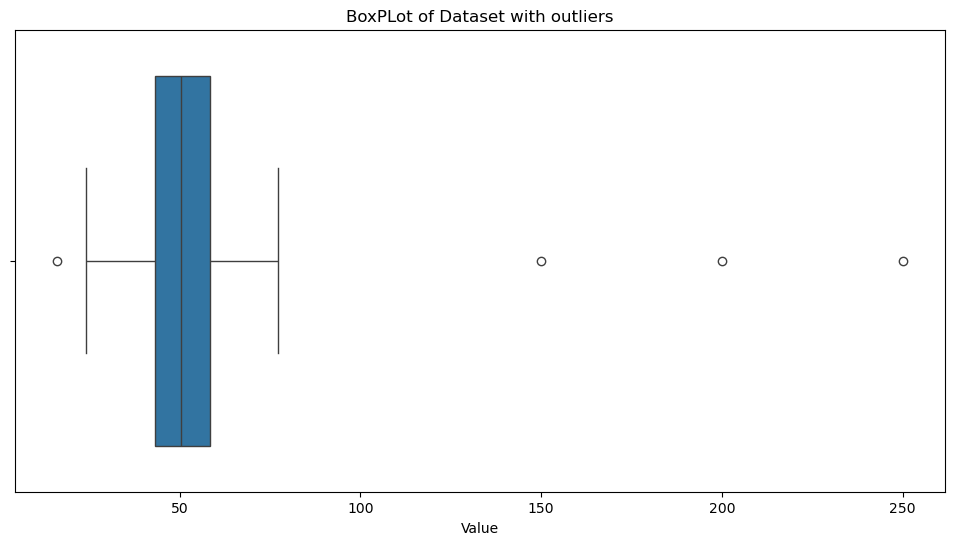

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=np.random.normal(50,10,100)
data=np.append(data,[150,200,250])

df=pd.DataFrame(data,columns=['Value'])
print(df)


plt.figure(figsize=(12,6))
sns.boxplot(x=df['Value'])
plt.title('BoxPLot of Dataset with outliers')
plt.show()

In [39]:
from scipy.stats import zscore

df['Z-score']= zscore(df['Value'])

outliers_z=df[(df['Z-score']>3) | (df['Z-score']<-3)]
print(outliers_z)

     Value   Z-score
100  150.0  3.376900
101  200.0  5.139853
102  250.0  6.902806


In [40]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1

outliers_iqr=df[(df['Value']<(Q1-1.5*IQR)) | (df['Value']>(Q3+1.5*IQR))]
print(outliers_iqr)

          Value   Z-score
86    16.120029 -1.343581
100  150.000000  3.376900
101  200.000000  5.139853
102  250.000000  6.902806


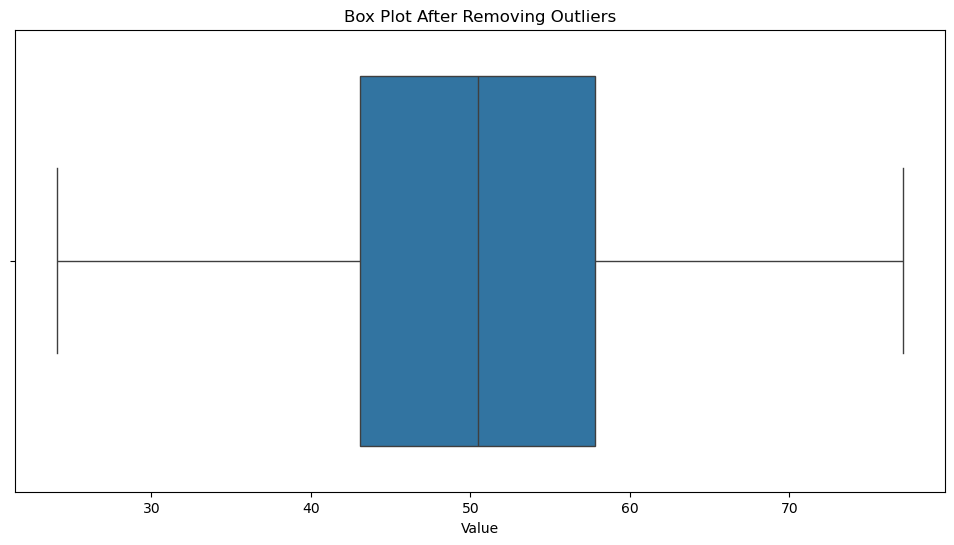

In [41]:
df_no_outliers=df[(df['Value']>=(Q1-1.5*IQR)) & (df['Value']<=(Q3+1.5*IQR))]

plt.figure(figsize=(12,6))
sns.boxplot(x=df_no_outliers['Value'])
plt.title('Box Plot After Removing Outliers')
plt.show()

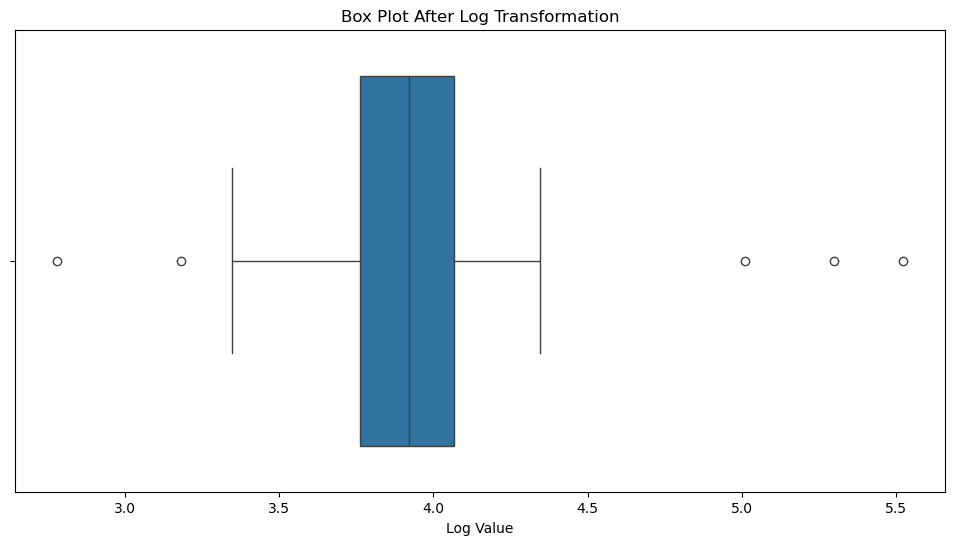

In [42]:
df['Log Value']=np.log(df['Value'])

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Log Value'])
plt.title('Box Plot After Log Transformation')
plt.show()

0      42.605507
1      59.527468
2      37.901134
3      54.364949
4      52.341355
         ...    
98     41.380269
99     73.281531
100    73.787941
101    73.787941
102    73.787941
Name: Capped Value, Length: 103, dtype: float64


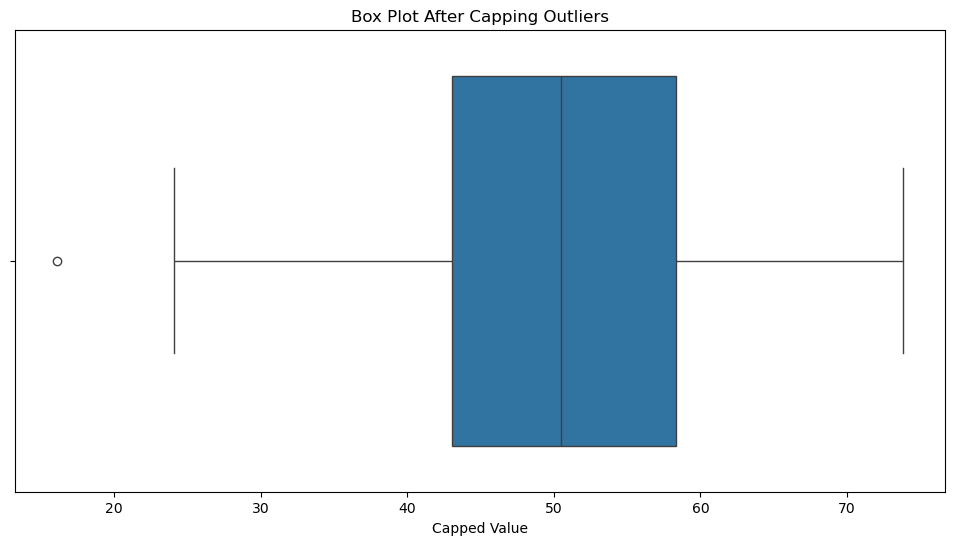

In [43]:
cap_value=df['Value'].quantile(0.95)
df['Capped Value']=np.where(df['Value']>cap_value, cap_value, df['Value'])
print(df['Capped Value'])

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Capped Value'])
plt.title('Box Plot After Capping Outliers')
plt.show()

In [44]:
from sklearn.ensemble import IsolationForest
import numpy as np

iso_forest=IsolationForest(contamination=0.2)
iso_forest.fit(df)

predictions=iso_forest.predict(df)
print(predictions)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1
 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1 -1  1  1
  1 -1  1 -1 -1 -1 -1]


In [45]:
from sklearn.svm import OneClassSVM
import numpy as np
import pandas as pd

data={'transaction_amount':[100,150,200,250,10000,120,180,240,110,9000]}
df=pd.DataFrame(data)

oc_svm=OneClassSVM(kernel='rbf', gamma=0.0001, nu=0.3)
oc_svm.fit(df)

df['is_fraud']=oc_svm.predict(df)

df['is_fraud']=df['is_fraud'].map({1:'Normal', -1:'Fraud'})

print(df)

   transaction_amount is_fraud
0                 100   Normal
1                 150   Normal
2                 200   Normal
3                 250   Normal
4               10000    Fraud
5                 120   Normal
6                 180   Normal
7                 240   Normal
8                 110   Normal
9                9000    Fraud


In [46]:
from sklearn.svm import OneClassSVM
import numpy as np
import pandas as pd

data={'transaction_amount':[100,150,200,250,10000,120,180,240,110,9000]}
df=pd.DataFrame(data)

oc_svm=OneClassSVM(kernel='linear', gamma=0.0001, nu=0.3)
oc_svm.fit(df)

df['is_fraud']=oc_svm.predict(df)

df['is_fraud']=df['is_fraud'].map({1:'Normal', -1:'Fraud'})

print(df)

   transaction_amount is_fraud
0                 100    Fraud
1                 150   Normal
2                 200   Normal
3                 250   Normal
4               10000   Normal
5                 120    Fraud
6                 180   Normal
7                 240   Normal
8                 110    Fraud
9                9000   Normal


In [47]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [48]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

text="Natural Language Processing is fascinating"
tokens= word_tokenize(text)
print(tokens)

['Natural', 'Language', 'Processing', 'is', 'fascinating']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
text="Natural Language Processing is fascinating"
lowercased_text=text.lower()
print(lowercased_text)

natural language processing is fascinating


In [50]:
import string 
text="Natural, Language? Processing! is Fascinating."
cleaned_text=text.translate(str.maketrans('','', string.punctuation))
print(cleaned_text)

Natural Language Processing is Fascinating


In [51]:
from nltk.corpus import stopwords

nltk.download('stopwords')

text='Natural Language Processing is fascinating'
stop_words=set(stopwords.words('english'))
filtered_words=[word for word in word_tokenize(text) if word.lower() not in stop_words]
print(filtered_words)

['Natural', 'Language', 'Processing', 'fascinating']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
words=['fascinating','fascinated','fascinates']
stemmed_words=[ps.stem(word) for word in words]
print(stemmed_words)

['fascin', 'fascin', 'fascin']


In [53]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer=WordNetLemmatizer()
words=["Better",'running','fascinated']
lemmatized_words=[lemmatizer.lemmatize(word, pos='v')for word in words]
print(lemmatized_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['Better', 'run', 'fascinate']


In [54]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [55]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
text="Bert can handle Out-of-Vocabulary words like transformers"
tokens=tokenizer.tokenize(text)
print(tokens)

['bert', 'can', 'handle', 'out', '-', 'of', '-', 'vocabulary', 'words', 'like', 'transformers']


C:\Users\A\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [56]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [57]:
import contractions
text="I'm learning NLP. Don't Stop!"
expanded_text=contractions.fix(text)
print(expanded_text)

I am learning NLP. Do not Stop!


In [58]:
import re 
text="The price is $500 #expensive 😭"
cleaned_text=re.sub(r'[^a-zA-Z\s]', '', text)
print(cleaned_text)

The price is  expensive 


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=['Natural Language Processing is Fascinatiing','I love learning NLP']

vectorizer= TfidfVectorizer()
tfidf_matrix= vectorizer.fit_transform(corpus)
print(tfidf_matrix.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.         0.4472136
  0.         0.4472136 ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.        ]]


In [117]:
import pandas as pd
import numpy as np

# Create a date range
data_range = pd.date_range(start='2023-01-01', periods=10, freq='D')

# Create a DataFrame with missing values
data = pd.DataFrame({'value': [1.2, 2.3, np.nan, 3.4, 4.5, np.nan, 5.6, 6.7, np.nan, 7.8]}, index=data_range)

print('Original Data with Missing Values:')
print(dat)

# method 1: Forward Fill
data_ffill = dat.fillna(method='ffill')

# method 2: Backward Fill
data_bfill = dat.fillna(method='bfill')

# method 3: Interpolation
data_interp = dat.interpolate()

print('\nData after Forward Fill:')
print(data_ffill)

print('\nData after Backward Fill:')
print(data_bfill)

print('\nData after Interpolation:')
print(data_interp)


Original Data with Missing Values:
            value
2023-01-01    1.2
2023-01-02    2.3
2023-01-03    NaN
2023-01-04    3.4
2023-01-05    4.5
2023-01-06    NaN
2023-01-07    5.6
2023-01-08    6.7
2023-01-09    NaN
2023-01-10    7.8

Data after Forward Fill:
            value
2023-01-01    1.2
2023-01-02    2.3
2023-01-03    2.3
2023-01-04    3.4
2023-01-05    4.5
2023-01-06    4.5
2023-01-07    5.6
2023-01-08    6.7
2023-01-09    6.7
2023-01-10    7.8

Data after Backward Fill:
            value
2023-01-01    1.2
2023-01-02    2.3
2023-01-03    3.4
2023-01-04    3.4
2023-01-05    4.5
2023-01-06    5.6
2023-01-07    5.6
2023-01-08    6.7
2023-01-09    7.8
2023-01-10    7.8

Data after Interpolation:
            value
2023-01-01   1.20
2023-01-02   2.30
2023-01-03   2.85
2023-01-04   3.40
2023-01-05   4.50
2023-01-06   5.05
2023-01-07   5.60
2023-01-08   6.70
2023-01-09   7.25
2023-01-10   7.80


C:\Users\A\AppData\Local\Temp\ipykernel_18152\3087130432.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill = dat.fillna(method='ffill')
C:\Users\A\AppData\Local\Temp\ipykernel_18152\3087130432.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bfill = dat.fillna(method='bfill')


In [119]:
data_monthly=data.resample('M').sum()

data_weekly=data.resample('W').mean()

print("\nData Resampled to Monthly Frequency:")
print(data_monthly)

print("\nData Resampled to Weekly Frequency:")
print(data_weekly)


Data Resampled to Monthly Frequency:
            value
2023-01-31   31.5

Data Resampled to Weekly Frequency:
            value
2023-01-01    1.2
2023-01-08    4.5
2023-01-15    7.8


C:\Users\A\AppData\Local\Temp\ipykernel_18152\2285809710.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly=data.resample('M').sum()


In [121]:
data_smooth=data.interpolate().rolling(window=3).mean()

print("\nData After rolling window smooth:")
print(data_smooth)


Data After rolling window smooth:
               value
2023-01-01       NaN
2023-01-02       NaN
2023-01-03  2.116667
2023-01-04  2.850000
2023-01-05  3.583333
2023-01-06  4.316667
2023-01-07  5.050000
2023-01-08  5.783333
2023-01-09  6.516667
2023-01-10  7.250000


In [123]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(data_interp['value'])

print(f"p-value:{adf_test[1]}")

p-value:0.9774016443222497


In [ ]:
data_diff=data_interp.diff()dropna()

print("\n Data After Differencing (Detrending)")

In [127]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data_standardized=scaler.fit_transform(data_interp)

print("\n Standardized Data:")
print(data_standardized)


 Standardized Data:
[[-1.64822099]
 [-1.12497623]
 [-0.86335385]
 [-0.60173147]
 [-0.07848671]
 [ 0.18313567]
 [ 0.44475805]
 [ 0.96800281]
 [ 1.22962519]
 [ 1.49124757]]


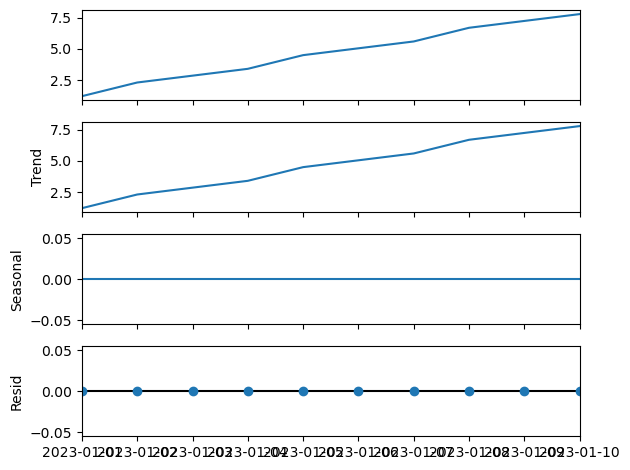

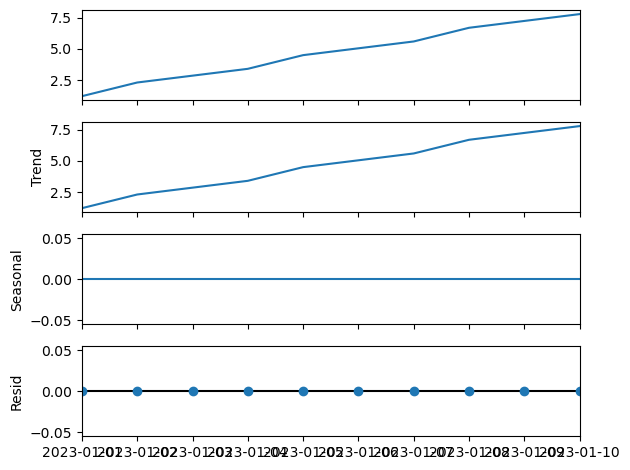

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(data_interp,model='additive',period=1)
decomposition.plot()

In [131]:
data['lag_1']=data['value'].shift(1)

print(data)

            value  lag_1
2023-01-01    1.2    NaN
2023-01-02    2.3    1.2
2023-01-03    NaN    2.3
2023-01-04    3.4    NaN
2023-01-05    4.5    3.4
2023-01-06    NaN    4.5
2023-01-07    5.6    NaN
2023-01-08    6.7    5.6
2023-01-09    NaN    6.7
2023-01-10    7.8    NaN
